In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: CSCO
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


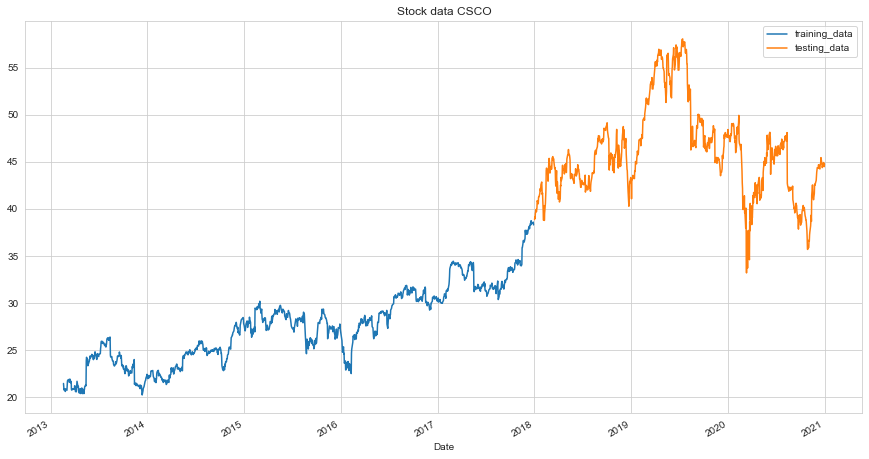

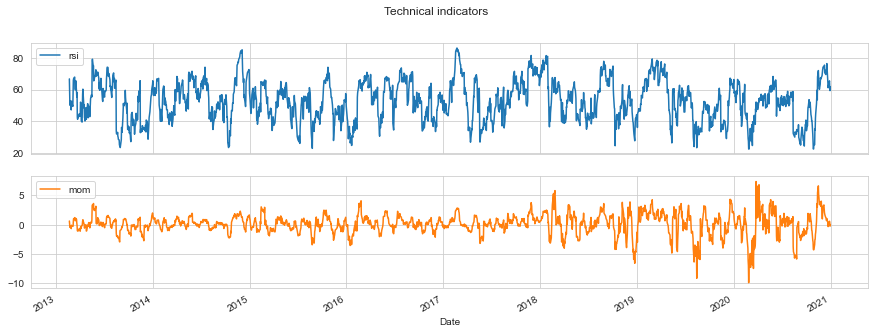

In [11]:
stock_name = 'csco'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [12]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1297.80, duration: 0:00:00.226056
episode: 2/2000, episode end value: 1277.18, duration: 0:00:00.195037
episode: 3/2000, episode end value: 1290.29, duration: 0:00:00.193055
episode: 4/2000, episode end value: 1219.06, duration: 0:00:00.208706
episode: 5/2000, episode end value: 1239.03, duration: 0:00:00.200064
episode: 6/2000, episode end value: 1305.83, duration: 0:00:00.203096
episode: 7/2000, episode end value: 1298.69, duration: 0:00:00.197166
episode: 8/2000, episode end value: 1297.66, duration: 0:00:00.195637
episode: 9/2000, episode end value: 1323.53, duration: 0:00:00.213067
episode: 10/2000, episode end value: 1293.26, duration: 0:00:00.204046
episode: 11/2000, episode end value: 1317.70, duration: 0:00:00.203045
episode: 12/2000, episode end value: 1298.44, duration: 0:00:00.203045
episode: 13/2000, episode end value: 1297.06, duration: 0:00:00.202300
episode: 14/2000, episode end value: 1325.94, duration: 0:00:00.205045
episode: 15/200

episode: 117/2000, episode end value: 1317.70, duration: 0:00:00.226045
episode: 118/2000, episode end value: 1307.78, duration: 0:00:00.223055
episode: 119/2000, episode end value: 1307.74, duration: 0:00:00.220138
episode: 120/2000, episode end value: 1323.73, duration: 0:00:00.220554
episode: 121/2000, episode end value: 1311.97, duration: 0:00:00.207042
episode: 122/2000, episode end value: 1322.74, duration: 0:00:00.222022
episode: 123/2000, episode end value: 1333.27, duration: 0:00:00.212997
episode: 124/2000, episode end value: 1322.86, duration: 0:00:00.210033
episode: 125/2000, episode end value: 1325.74, duration: 0:00:00.214989
episode: 126/2000, episode end value: 1324.12, duration: 0:00:00.208999
episode: 127/2000, episode end value: 1313.47, duration: 0:00:00.223994
episode: 128/2000, episode end value: 1308.99, duration: 0:00:00.220987
episode: 129/2000, episode end value: 1317.70, duration: 0:00:00.220023
episode: 130/2000, episode end value: 1317.95, duration: 0:00:00

episode: 231/2000, episode end value: 1295.88, duration: 0:00:00.220050
episode: 232/2000, episode end value: 1302.64, duration: 0:00:00.223050
episode: 233/2000, episode end value: 1308.60, duration: 0:00:00.213048
episode: 234/2000, episode end value: 1298.94, duration: 0:00:00.208046
episode: 235/2000, episode end value: 1325.49, duration: 0:00:00.225051
episode: 236/2000, episode end value: 1300.04, duration: 0:00:00.207045
episode: 237/2000, episode end value: 1299.19, duration: 0:00:00.218049
episode: 238/2000, episode end value: 1299.98, duration: 0:00:00.216048
episode: 239/2000, episode end value: 1322.17, duration: 0:00:00.208040
episode: 240/2000, episode end value: 1315.89, duration: 0:00:00.198050
episode: 241/2000, episode end value: 1320.32, duration: 0:00:00.212041
episode: 242/2000, episode end value: 1316.87, duration: 0:00:00.205385
episode: 243/2000, episode end value: 1313.38, duration: 0:00:00.207824
episode: 244/2000, episode end value: 1333.56, duration: 0:00:00

episode: 345/2000, episode end value: 1316.58, duration: 0:00:00.207059
episode: 346/2000, episode end value: 1313.38, duration: 0:00:00.217036
episode: 347/2000, episode end value: 1308.49, duration: 0:00:00.225050
episode: 348/2000, episode end value: 1294.14, duration: 0:00:00.213048
episode: 349/2000, episode end value: 1308.99, duration: 0:00:00.224030
episode: 350/2000, episode end value: 1312.39, duration: 0:00:00.231072
episode: 351/2000, episode end value: 1318.98, duration: 0:00:00.206046
episode: 352/2000, episode end value: 1313.39, duration: 0:00:00.209212
episode: 353/2000, episode end value: 1308.56, duration: 0:00:00.219074
episode: 354/2000, episode end value: 1320.06, duration: 0:00:00.215085
episode: 355/2000, episode end value: 1303.94, duration: 0:00:00.206208
episode: 356/2000, episode end value: 1295.63, duration: 0:00:00.207047
episode: 357/2000, episode end value: 1311.52, duration: 0:00:00.200118
episode: 358/2000, episode end value: 1321.65, duration: 0:00:00

episode: 459/2000, episode end value: 1310.93, duration: 0:00:00.205045
episode: 460/2000, episode end value: 1310.35, duration: 0:00:00.195044
episode: 461/2000, episode end value: 1307.24, duration: 0:00:00.232050
episode: 462/2000, episode end value: 1299.56, duration: 0:00:00.208046
episode: 463/2000, episode end value: 1305.17, duration: 0:00:00.216103
episode: 464/2000, episode end value: 1310.07, duration: 0:00:00.234037
episode: 465/2000, episode end value: 1319.55, duration: 0:00:00.218070
episode: 466/2000, episode end value: 1298.59, duration: 0:00:00.204039
episode: 467/2000, episode end value: 1312.34, duration: 0:00:00.206044
episode: 468/2000, episode end value: 1317.35, duration: 0:00:00.213055
episode: 469/2000, episode end value: 1303.00, duration: 0:00:00.206999
episode: 470/2000, episode end value: 1308.97, duration: 0:00:00.213062
episode: 471/2000, episode end value: 1320.19, duration: 0:00:00.207044
episode: 472/2000, episode end value: 1315.01, duration: 0:00:00

episode: 573/2000, episode end value: 1304.30, duration: 0:00:00.200045
episode: 574/2000, episode end value: 1326.16, duration: 0:00:00.197044
episode: 575/2000, episode end value: 1322.51, duration: 0:00:00.209047
episode: 576/2000, episode end value: 1306.33, duration: 0:00:00.202045
episode: 577/2000, episode end value: 1307.92, duration: 0:00:00.213047
episode: 578/2000, episode end value: 1291.98, duration: 0:00:00.212047
episode: 579/2000, episode end value: 1282.45, duration: 0:00:00.208046
episode: 580/2000, episode end value: 1295.67, duration: 0:00:00.226051
episode: 581/2000, episode end value: 1319.92, duration: 0:00:00.209047
episode: 582/2000, episode end value: 1302.44, duration: 0:00:00.202060
episode: 583/2000, episode end value: 1284.62, duration: 0:00:00.207030
episode: 584/2000, episode end value: 1296.98, duration: 0:00:00.218049
episode: 585/2000, episode end value: 1277.39, duration: 0:00:00.217056
episode: 586/2000, episode end value: 1294.52, duration: 0:00:00

episode: 688/2000, episode end value: 1304.52, duration: 0:00:00.208047
episode: 689/2000, episode end value: 1302.28, duration: 0:00:00.216049
episode: 690/2000, episode end value: 1308.85, duration: 0:00:00.230068
episode: 691/2000, episode end value: 1320.77, duration: 0:00:00.219029
episode: 692/2000, episode end value: 1307.11, duration: 0:00:00.201045
episode: 693/2000, episode end value: 1300.67, duration: 0:00:00.199057
episode: 694/2000, episode end value: 1309.63, duration: 0:00:00.211047
episode: 695/2000, episode end value: 1282.91, duration: 0:00:00.213047
episode: 696/2000, episode end value: 1287.90, duration: 0:00:00.208046
episode: 697/2000, episode end value: 1302.64, duration: 0:00:00.217048
episode: 698/2000, episode end value: 1297.74, duration: 0:00:00.224045
episode: 699/2000, episode end value: 1286.02, duration: 0:00:00.227049
episode: 700/2000, episode end value: 1299.98, duration: 0:00:00.231046
episode: 701/2000, episode end value: 1280.05, duration: 0:00:00

episode: 803/2000, episode end value: 1300.31, duration: 0:00:00.202118
episode: 804/2000, episode end value: 1301.43, duration: 0:00:00.203030
episode: 805/2000, episode end value: 1280.41, duration: 0:00:00.209745
episode: 806/2000, episode end value: 1284.81, duration: 0:00:00.227323
episode: 807/2000, episode end value: 1287.92, duration: 0:00:00.217437
episode: 808/2000, episode end value: 1281.59, duration: 0:00:00.229593
episode: 809/2000, episode end value: 1282.47, duration: 0:00:00.216047
episode: 810/2000, episode end value: 1294.62, duration: 0:00:00.227049
episode: 811/2000, episode end value: 1316.69, duration: 0:00:00.210054
episode: 812/2000, episode end value: 1304.24, duration: 0:00:00.203045
episode: 813/2000, episode end value: 1304.81, duration: 0:00:00.199058
episode: 814/2000, episode end value: 1290.87, duration: 0:00:00.201045
episode: 815/2000, episode end value: 1282.96, duration: 0:00:00.205047
episode: 816/2000, episode end value: 1328.79, duration: 0:00:00

episode: 918/2000, episode end value: 1296.91, duration: 0:00:00.219096
episode: 919/2000, episode end value: 1312.82, duration: 0:00:00.229087
episode: 920/2000, episode end value: 1296.44, duration: 0:00:00.214079
episode: 921/2000, episode end value: 1284.39, duration: 0:00:00.206157
episode: 922/2000, episode end value: 1313.93, duration: 0:00:00.234645
episode: 923/2000, episode end value: 1302.54, duration: 0:00:00.218048
episode: 924/2000, episode end value: 1299.09, duration: 0:00:00.218048
episode: 925/2000, episode end value: 1310.12, duration: 0:00:00.205282
episode: 926/2000, episode end value: 1300.24, duration: 0:00:00.209127
episode: 927/2000, episode end value: 1302.22, duration: 0:00:00.207231
episode: 928/2000, episode end value: 1302.07, duration: 0:00:00.219197
episode: 929/2000, episode end value: 1291.79, duration: 0:00:00.200050
episode: 930/2000, episode end value: 1313.08, duration: 0:00:00.207040
episode: 931/2000, episode end value: 1309.14, duration: 0:00:00

episode: 1032/2000, episode end value: 1319.39, duration: 0:00:00.217069
episode: 1033/2000, episode end value: 1312.87, duration: 0:00:00.203046
episode: 1034/2000, episode end value: 1312.04, duration: 0:00:00.207052
episode: 1035/2000, episode end value: 1302.85, duration: 0:00:00.191062
episode: 1036/2000, episode end value: 1320.44, duration: 0:00:00.204045
episode: 1037/2000, episode end value: 1321.19, duration: 0:00:00.200032
episode: 1038/2000, episode end value: 1320.90, duration: 0:00:00.198151
episode: 1039/2000, episode end value: 1316.90, duration: 0:00:00.205380
episode: 1040/2000, episode end value: 1290.54, duration: 0:00:00.210166
episode: 1041/2000, episode end value: 1309.21, duration: 0:00:00.233154
episode: 1042/2000, episode end value: 1306.92, duration: 0:00:00.211048
episode: 1043/2000, episode end value: 1313.99, duration: 0:00:00.216048
episode: 1044/2000, episode end value: 1321.46, duration: 0:00:00.220069
episode: 1045/2000, episode end value: 1288.85, dur

episode: 1145/2000, episode end value: 1313.50, duration: 0:00:00.220071
episode: 1146/2000, episode end value: 1294.34, duration: 0:00:00.206630
episode: 1147/2000, episode end value: 1310.59, duration: 0:00:00.230720
episode: 1148/2000, episode end value: 1310.69, duration: 0:00:00.215049
episode: 1149/2000, episode end value: 1294.86, duration: 0:00:00.202045
episode: 1150/2000, episode end value: 1302.00, duration: 0:00:00.217430
episode: 1151/2000, episode end value: 1302.81, duration: 0:00:00.234784
episode: 1152/2000, episode end value: 1299.12, duration: 0:00:00.226050
episode: 1153/2000, episode end value: 1307.79, duration: 0:00:00.209053
episode: 1154/2000, episode end value: 1299.97, duration: 0:00:00.203308
episode: 1155/2000, episode end value: 1318.22, duration: 0:00:00.208029
episode: 1156/2000, episode end value: 1297.00, duration: 0:00:00.203184
episode: 1157/2000, episode end value: 1298.22, duration: 0:00:00.206046
episode: 1158/2000, episode end value: 1308.58, dur

episode: 1258/2000, episode end value: 1292.40, duration: 0:00:00.203048
episode: 1259/2000, episode end value: 1300.26, duration: 0:00:00.207047
episode: 1260/2000, episode end value: 1319.15, duration: 0:00:00.212049
episode: 1261/2000, episode end value: 1286.52, duration: 0:00:00.229553
episode: 1262/2000, episode end value: 1301.57, duration: 0:00:00.223049
episode: 1263/2000, episode end value: 1313.40, duration: 0:00:00.208093
episode: 1264/2000, episode end value: 1298.93, duration: 0:00:00.211039
episode: 1265/2000, episode end value: 1284.51, duration: 0:00:00.206046
episode: 1266/2000, episode end value: 1305.38, duration: 0:00:00.224051
episode: 1267/2000, episode end value: 1310.34, duration: 0:00:00.223050
episode: 1268/2000, episode end value: 1330.68, duration: 0:00:00.218050
episode: 1269/2000, episode end value: 1291.85, duration: 0:00:00.199354
episode: 1270/2000, episode end value: 1295.68, duration: 0:00:00.210548
episode: 1271/2000, episode end value: 1308.85, dur

episode: 1372/2000, episode end value: 1303.76, duration: 0:00:00.208261
episode: 1373/2000, episode end value: 1298.14, duration: 0:00:00.202038
episode: 1374/2000, episode end value: 1308.32, duration: 0:00:00.218573
episode: 1375/2000, episode end value: 1306.74, duration: 0:00:00.209533
episode: 1376/2000, episode end value: 1300.10, duration: 0:00:00.194043
episode: 1377/2000, episode end value: 1305.43, duration: 0:00:00.202045
episode: 1378/2000, episode end value: 1292.82, duration: 0:00:00.195150
episode: 1379/2000, episode end value: 1327.33, duration: 0:00:00.215111
episode: 1380/2000, episode end value: 1306.97, duration: 0:00:00.204045
episode: 1381/2000, episode end value: 1303.88, duration: 0:00:00.211053
episode: 1382/2000, episode end value: 1309.79, duration: 0:00:00.217368
episode: 1383/2000, episode end value: 1298.05, duration: 0:00:00.203547
episode: 1384/2000, episode end value: 1312.42, duration: 0:00:00.221049
episode: 1385/2000, episode end value: 1295.66, dur

episode: 1485/2000, episode end value: 1318.46, duration: 0:00:00.197036
episode: 1486/2000, episode end value: 1318.86, duration: 0:00:00.200034
episode: 1487/2000, episode end value: 1304.93, duration: 0:00:00.197044
episode: 1488/2000, episode end value: 1314.78, duration: 0:00:00.194044
episode: 1489/2000, episode end value: 1305.95, duration: 0:00:00.205047
episode: 1490/2000, episode end value: 1306.21, duration: 0:00:00.220050
episode: 1491/2000, episode end value: 1290.37, duration: 0:00:00.212554
episode: 1492/2000, episode end value: 1280.50, duration: 0:00:00.223050
episode: 1493/2000, episode end value: 1314.97, duration: 0:00:00.229047
episode: 1494/2000, episode end value: 1297.71, duration: 0:00:00.207047
episode: 1495/2000, episode end value: 1307.03, duration: 0:00:00.223258
episode: 1496/2000, episode end value: 1292.59, duration: 0:00:00.215049
episode: 1497/2000, episode end value: 1274.07, duration: 0:00:00.193608
episode: 1498/2000, episode end value: 1316.50, dur

episode: 1598/2000, episode end value: 1291.34, duration: 0:00:00.222035
episode: 1599/2000, episode end value: 1311.43, duration: 0:00:00.224050
episode: 1600/2000, episode end value: 1305.38, duration: 0:00:00.196072
episode: 1601/2000, episode end value: 1313.83, duration: 0:00:00.199024
episode: 1602/2000, episode end value: 1313.34, duration: 0:00:00.197046
episode: 1603/2000, episode end value: 1325.40, duration: 0:00:00.203052
episode: 1604/2000, episode end value: 1322.72, duration: 0:00:00.199035
episode: 1605/2000, episode end value: 1291.56, duration: 0:00:00.196057
episode: 1606/2000, episode end value: 1283.07, duration: 0:00:00.198036
episode: 1607/2000, episode end value: 1301.33, duration: 0:00:00.210039
episode: 1608/2000, episode end value: 1278.86, duration: 0:00:00.208037
episode: 1609/2000, episode end value: 1315.97, duration: 0:00:00.240043
episode: 1610/2000, episode end value: 1303.58, duration: 0:00:00.201051
episode: 1611/2000, episode end value: 1294.23, dur

episode: 1711/2000, episode end value: 1302.57, duration: 0:00:00.210038
episode: 1712/2000, episode end value: 1313.71, duration: 0:00:00.223035
episode: 1713/2000, episode end value: 1313.43, duration: 0:00:00.194090
episode: 1714/2000, episode end value: 1320.38, duration: 0:00:00.192042
episode: 1715/2000, episode end value: 1334.04, duration: 0:00:00.187049
episode: 1716/2000, episode end value: 1298.61, duration: 0:00:00.193043
episode: 1717/2000, episode end value: 1307.93, duration: 0:00:00.197046
episode: 1718/2000, episode end value: 1326.01, duration: 0:00:00.197486
episode: 1719/2000, episode end value: 1306.22, duration: 0:00:00.194740
episode: 1720/2000, episode end value: 1316.94, duration: 0:00:00.191947
episode: 1721/2000, episode end value: 1322.50, duration: 0:00:00.196084
episode: 1722/2000, episode end value: 1271.36, duration: 0:00:00.192202
episode: 1723/2000, episode end value: 1317.46, duration: 0:00:00.201095
episode: 1724/2000, episode end value: 1317.85, dur

episode: 1824/2000, episode end value: 1303.79, duration: 0:00:00.212058
episode: 1825/2000, episode end value: 1310.91, duration: 0:00:00.211034
episode: 1826/2000, episode end value: 1295.58, duration: 0:00:00.201339
episode: 1827/2000, episode end value: 1281.66, duration: 0:00:00.193180
episode: 1828/2000, episode end value: 1309.34, duration: 0:00:00.206707
episode: 1829/2000, episode end value: 1302.16, duration: 0:00:00.211213
episode: 1830/2000, episode end value: 1298.65, duration: 0:00:00.207123
episode: 1831/2000, episode end value: 1301.38, duration: 0:00:00.213083
episode: 1832/2000, episode end value: 1303.97, duration: 0:00:00.239105
episode: 1833/2000, episode end value: 1302.53, duration: 0:00:00.209149
episode: 1834/2000, episode end value: 1299.42, duration: 0:00:00.223145
episode: 1835/2000, episode end value: 1303.63, duration: 0:00:00.223047
episode: 1836/2000, episode end value: 1319.11, duration: 0:00:00.225045
episode: 1837/2000, episode end value: 1312.30, dur

episode: 1937/2000, episode end value: 1292.29, duration: 0:00:00.209046
episode: 1938/2000, episode end value: 1302.48, duration: 0:00:00.217062
episode: 1939/2000, episode end value: 1320.26, duration: 0:00:00.505933
episode: 1940/2000, episode end value: 1326.63, duration: 0:00:00.311664
episode: 1941/2000, episode end value: 1307.76, duration: 0:00:00.357068
episode: 1942/2000, episode end value: 1321.22, duration: 0:00:00.331072
episode: 1943/2000, episode end value: 1303.67, duration: 0:00:00.257072
episode: 1944/2000, episode end value: 1318.87, duration: 0:00:00.215036
episode: 1945/2000, episode end value: 1289.19, duration: 0:00:00.202041
episode: 1946/2000, episode end value: 1290.32, duration: 0:00:00.321062
episode: 1947/2000, episode end value: 1283.42, duration: 0:00:00.458112
episode: 1948/2000, episode end value: 1305.47, duration: 0:00:00.343062
episode: 1949/2000, episode end value: 1304.82, duration: 0:00:00.296064
episode: 1950/2000, episode end value: 1314.30, dur

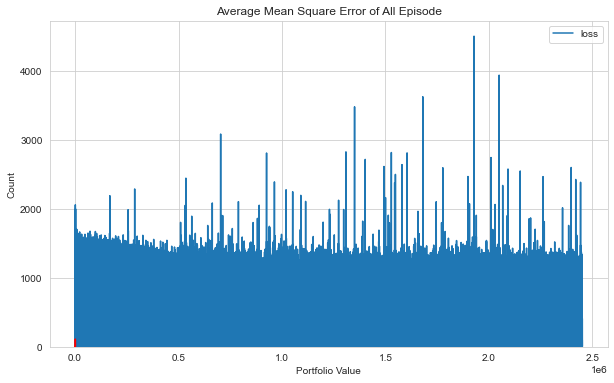

In [13]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

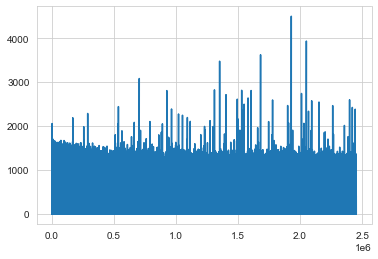

In [14]:
plt.plot(agent.model.losses)

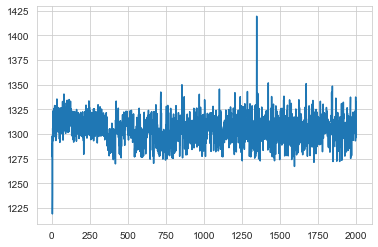

In [15]:
plt.plot(portfolio_value)

episode end value: 1000.00, duration: 0:00:00.053016
Sell: 0 times, Buy: 0 times


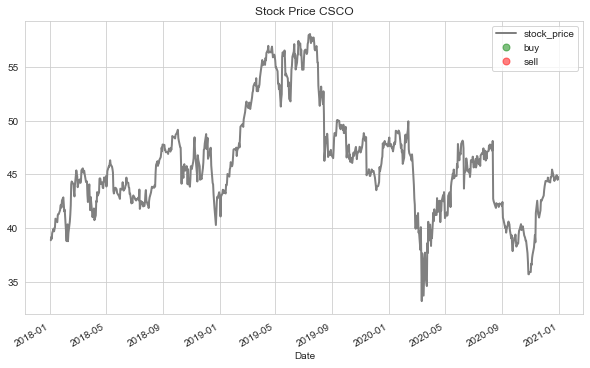

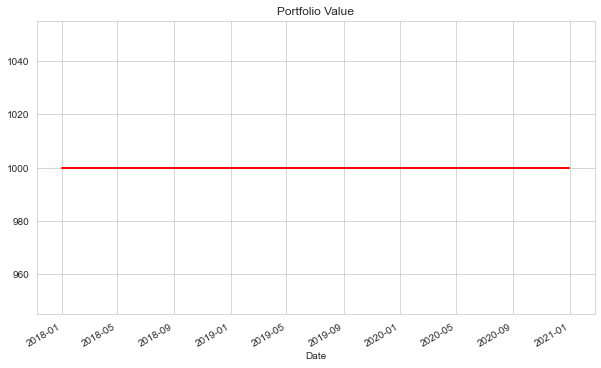

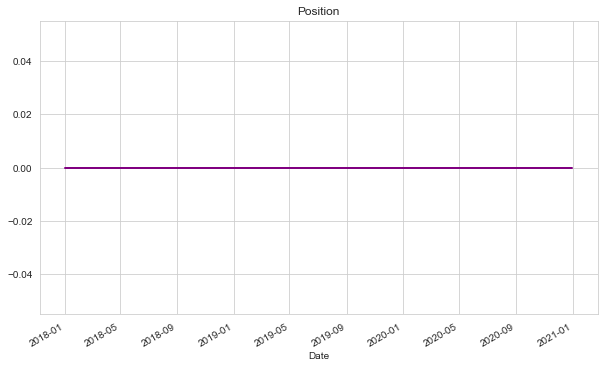

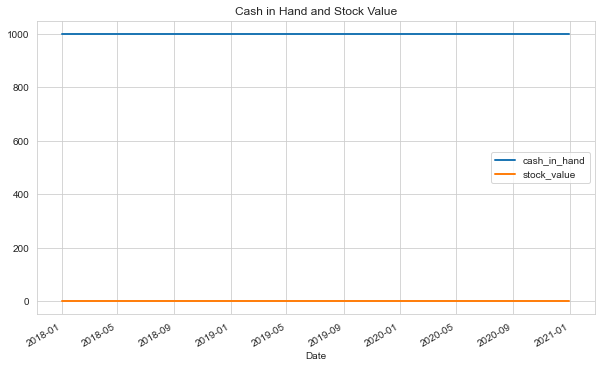

In [16]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [17]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CSCO
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 0.00 %
Volatility: 0.0000
shape ratio: -inf
Maximun drawdown: -0.00 %
Calmar ratio: nan
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 4.82 %
Volatility (benchmark): 0.3187
shape ratio: 0.1166
Maximun drawdown: -42.81 %
Calmar ratio (benchmark): 0.1125


<ipython-input-17-6057bcb27afc>:25: RuntimeWarning: divide by zero encountered in double_scalars
  sr = (CAGR(df) - rf)/volatility(df)
<ipython-input-17-6057bcb27afc>:43: RuntimeWarning: invalid value encountered in double_scalars
  clmr = CAGR(df)/max_dd(df)


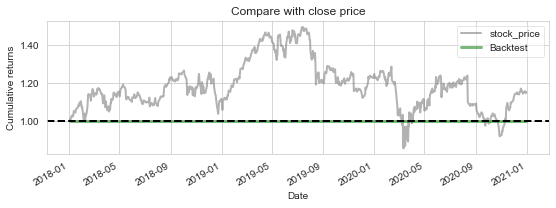

<ipython-input-17-6057bcb27afc>:25: RuntimeWarning: divide by zero encountered in double_scalars
  sr = (CAGR(df) - rf)/volatility(df)


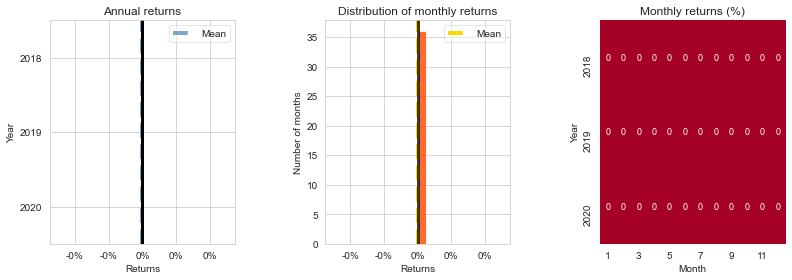

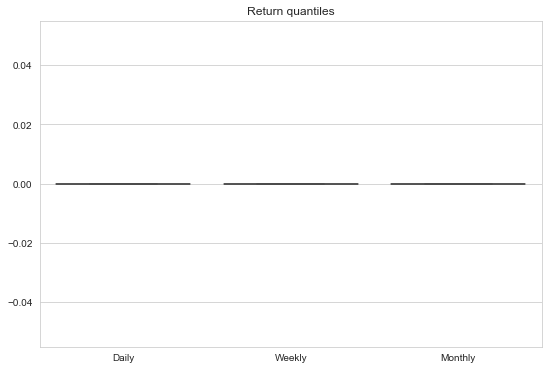

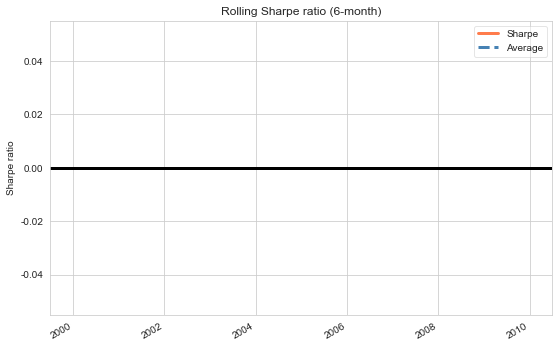

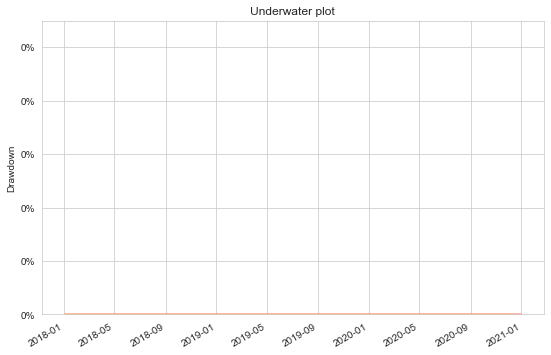

In [18]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')